In [34]:
from keras.datasets.mnist import load_data
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, LeakyReLU, Dropout, Flatten
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import keras

In [2]:
(train_X, train_y), (test_X, test_y) = load_data()

print('Train', train_X.shape, train_y.shape)
print('Test', test_X.shape, test_y.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


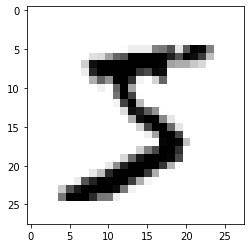

In [6]:
plt.imshow(train_X[0], cmap='gray_r')

In [11]:
def define_discriminator(in_shape=(28,28,1)):
    model = Sequential()
#     filters = 64, kernel = (3,3)
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same',
                    input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [28]:
def load_real_samples():
    (train_X, train_y), (test_X, test_y) = load_data()
    
#     X = train_X[:,:,:,np.newaxis]
    
    test_X = test_X.astype('float32')
    test_X = test_X / 255.0
    train_X = train_X.astype('float32')
    train_X = train_X / 255.0
    return train_X, train_y, test_X, test_y

In [29]:
def classification_check(model, n_iter, n_samples, train_X, train_y, test_X, test_y):
    
    for i in range(n_iter):
        ix = np.random.randint(0, train_X.shape[0], 5 * n_samples)
    
        trainX = train_X[ix]
        trainy = train_y[ix]
        
        _, acc = model.train_on_batch(trainX, trainy)
        
        print('Accuracy ', acc * 100)
        
    
    it = np.random.randint(0, test_X.shape[0], n_samples)
    testX = test_X[it]
    testy = test_y[it]
    

In [55]:
def classification_model(in_shape=(28,28), num_classes=10):
    
    model = Sequential()
    model.add(Flatten(input_shape=in_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10))
    return model

def train_classification(train_X, train_y,test_X, test_y):
    discriminator_model = classification_model()
#     train_y = to_categorical(train_y)
    
    discriminator_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    
    
#     early_stopping = keras.callbacks.EarlyStopping(patience=10,
#                                                    min_delta=0.001,
#                                                    restore_best_weights=True,
#                                                   )
    
    discriminator_model.fit(train_X, train_y, 
                       epochs=10,
                       )
    test_loss, test_acc = discriminator_model.evaluate(test_X,  test_y, verbose=2)

    print('\nTest accuracy:', test_acc)
    return discriminator_model



In [56]:
model = train_classification(train_X,train_y, test_X, test_y)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4510 - accuracy: 0.8595
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.9101
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9275
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2577 - accuracy: 0.9367
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2183 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - accuracy: 0.9470
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2016 - accuracy: 0.9511
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1942 - accuracy: 0.9528
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1871 - accuracy: 0.9548
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.183

In [59]:
probability_model = Sequential([model, 
                                keras.layers.Softmax()])


In [60]:
predictions = probability_model.predict(test_X)

313/313 [==============================] - 0s 1ms/step


In [63]:
np.argmax(predictions[0])

7

In [ ]:
# test_y[0]